This file is used to verify the output of the lidar to image projection

the numpy array is 4 lists, u, v, which are image coordinates, and d, i, distance intensity

In [46]:
import numpy as np
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt
import os
import cv2

In [54]:
i = 3
width = 1920
height = 1080
images_dir = "/Data/0207-0113/clear_day"
file = os.path.join(images_dir, f"lidar_2d/{i}.npy")
data = np.load(file)

v_coord = data[0].astype(int)
u_coord = data[1].astype(int)
intensity = data[2]
distance = data[3]

min_dist, max_dist = np.min(distance), np.max(distance)
distance_scaled = (255 - (255 * (distance - min_dist) / (max_dist - min_dist))).astype(int)

In [55]:
im = np.array(Image.open(os.path.join(images_dir, f"rgb/{i}.png")))

distance_capped = np.clip(distance, 1, 25)
distance_scaled = (255 - (255 * (distance_capped - min(distance_capped)) / (max(distance_capped) - min(distance_capped)))).astype(int)

VIRIDIS = np.array(cm.get_cmap('viridis').colors)
VID_RANGE = np.linspace(0.0, 1.0, VIRIDIS.shape[0])

color_map = np.array([
    np.interp(distance_scaled/255, VID_RANGE, VIRIDIS[:, 0]) * 255.0,
    np.interp(distance_scaled/255, VID_RANGE, VIRIDIS[:, 1]) * 255.0,
    np.interp(distance_scaled/255, VID_RANGE, VIRIDIS[:, 2]) * 255.0]).astype(np.int).T


for v, u, c in zip(v_coord, u_coord, color_map):
    c = (int(c[0]), int(c[1]), int(c[2]))
    cv2.circle(im, (u, v), radius = 2, thickness = -1, color = c)

cv2.imshow('image', im)
cv2.waitKey(0)
cv2.destroyAllWindows()

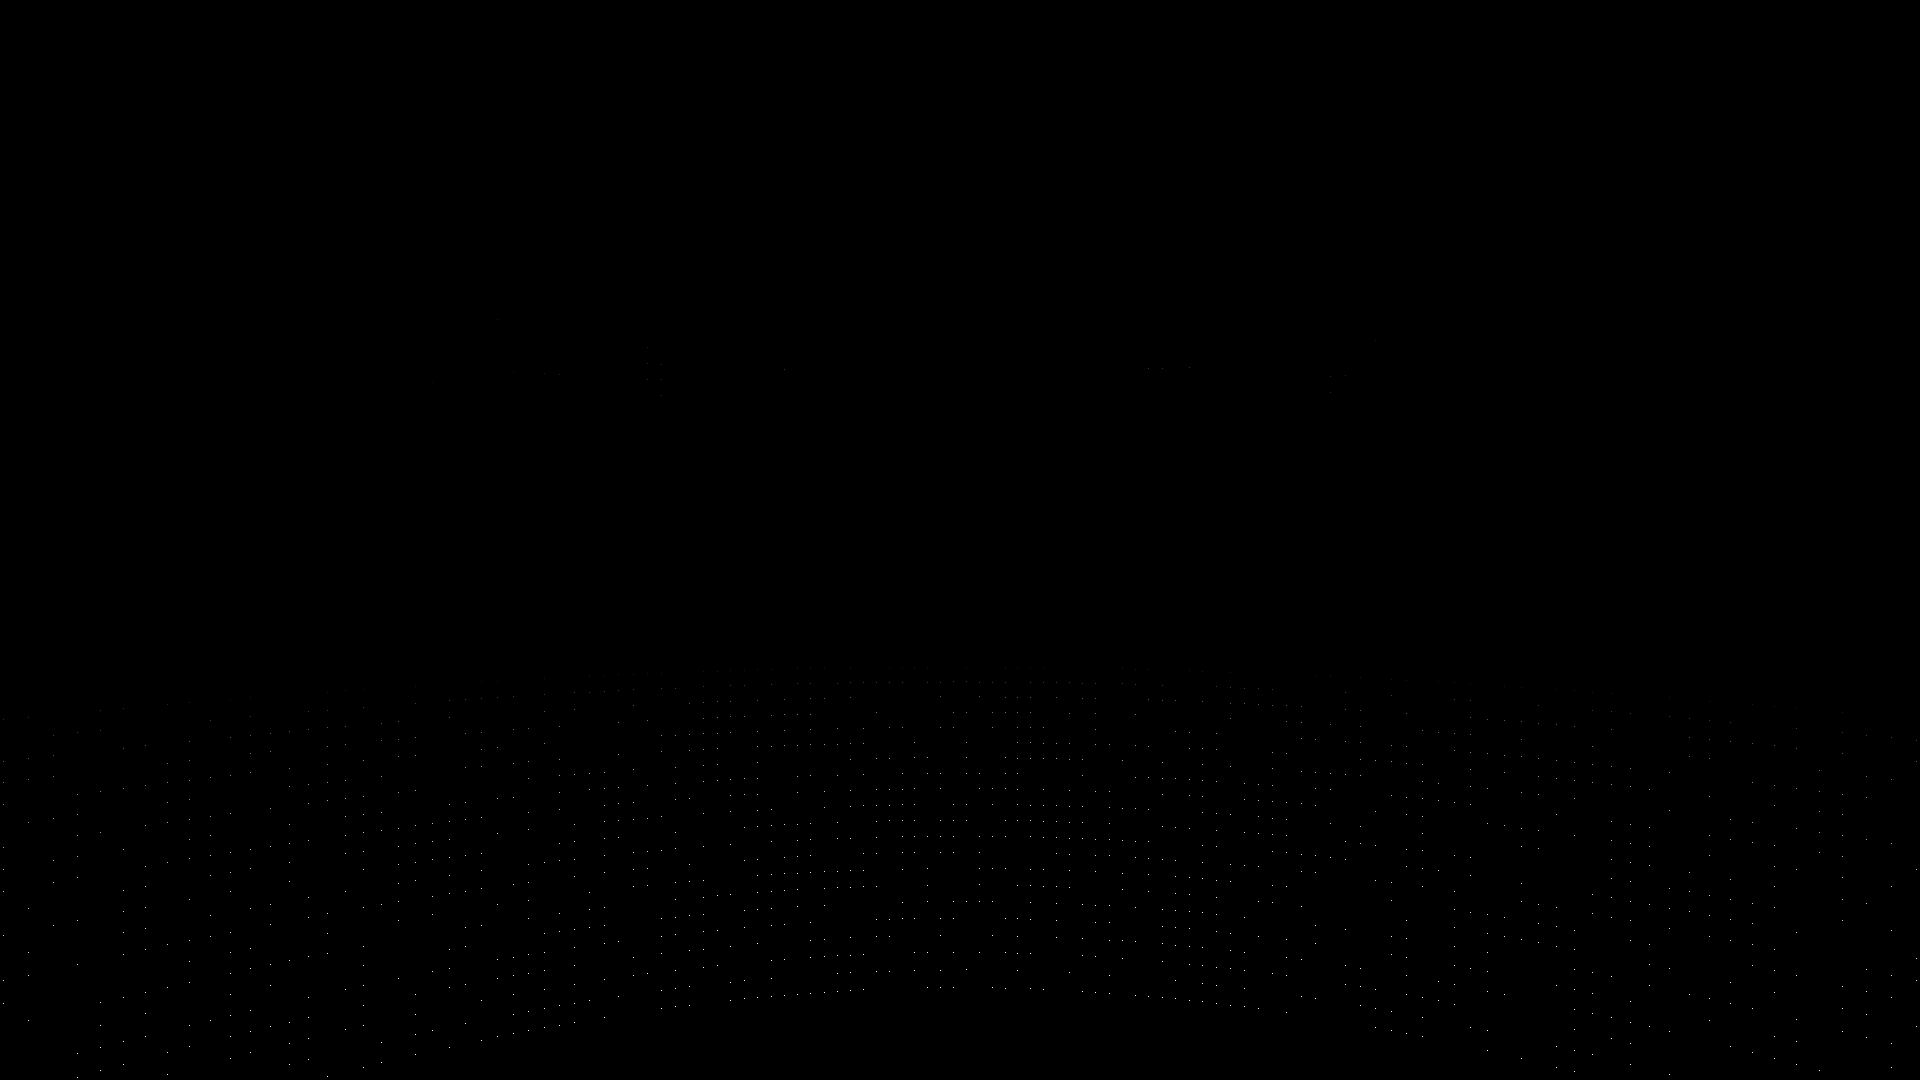

In [12]:
base_image = np.zeros((height, width), dtype=np.uint8)
base_image[v_coord, u_coord] = distance_scaled
Image.fromarray(base_image, mode = "L")

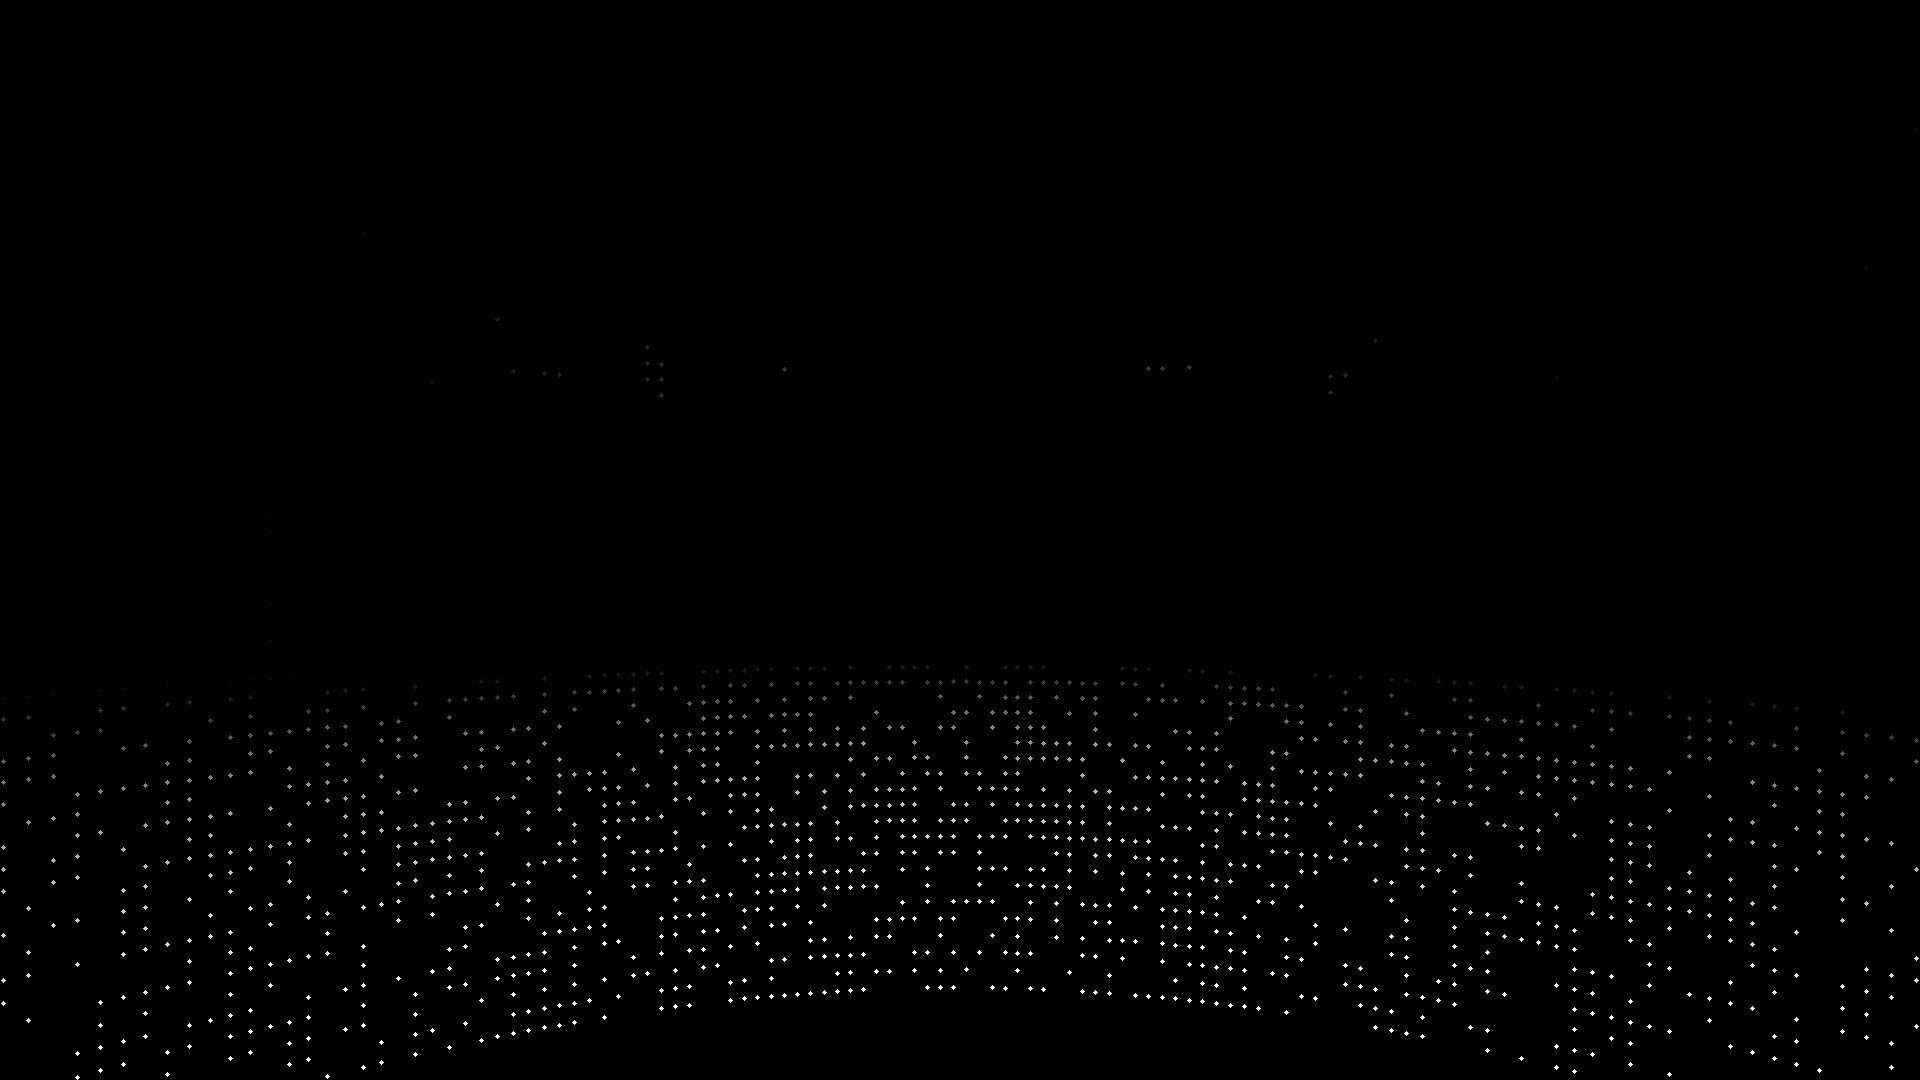

In [13]:
i_1 = np.zeros((height, width, 3))
for v, u, d in zip(v_coord, u_coord, distance_scaled):
    d = int(d)
    cv2.circle(i_1, (u, v), radius = 2, thickness = -1, color = (d, d, d))

Image.fromarray(i_1.astype(np.uint8), mode = 'RGB')